## Import Libs

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Retrieve the data

https://www.kaggle.com/datasets/devchauhan1/salary-datacsv

In [3]:
# Charger les données a partir d'un fichier csv
data = pd.read_csv('Salary_Data.csv')

In [5]:
# Voir les 5 premiéres instances
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
# voir les informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Preparing the data

In [8]:
# Selectionner les colonnes "YearsExperience" comme variable d'entrée
#et la colonne "Salary" comme variable cible
X = data[['YearsExperience']]
y = data['Salary']

(30,)

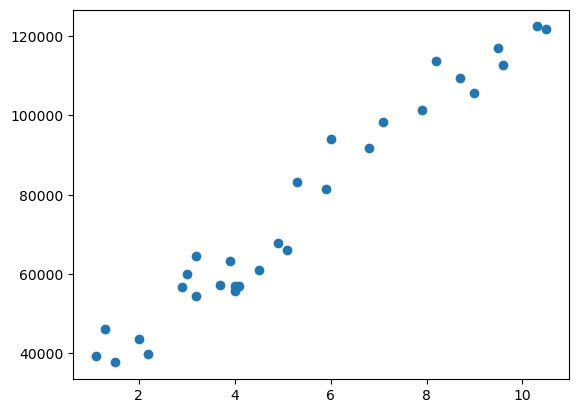

In [9]:
# Mettre les points sur un graphique
plt.scatter(X,y)

In [10]:
# séparer la datasetten train et test
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

# Build and train a model

In [11]:
# Importer la librairie LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #Instancier

In [12]:
regressor.fit(X_train,y_train) #Entrainement = produire l'equation linéaire

LinearRegression()

In [13]:
# Retrouver les coefficients et l'ordonnée a l'origine
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.19224403119


Text(0, 0.5, 'Salary')

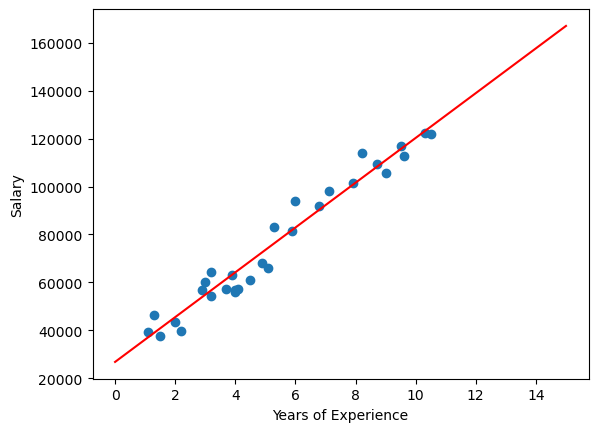

In [22]:
# Ajouter sur le graphique la droite
ordonne = np.linspace(0,15,1000)
plt.scatter(X,y)
plt.plot(ordonne, regressor.coef_[0]*ordonne+regressor.intercept_,color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

## Evaluate

let's evaluate the model by cheking out it's coefficients and how we can interpret them .

In [24]:
# Prédictions sur la base test
y_predict = regressor.predict(X_test)

In [29]:
# Métrique
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R²:', metrics.r2_score(y_test,y_predict))

MAE: 3426.4269374307123
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R²: 0.9749154407708353


In [34]:
NewData = [[5],[4], [3],[2.5]]
NewTest = pd.DataFrame(NewData, columns=['YearsExperience'])
NewTest.head()

,YearsExperience
0,5.0
1,4.0
2,3.0
3,2.5


In [35]:
y_new = regressor.predict(NewTest)
y_new

array([73545.90445964, 64199.96201652, 54854.0195734 , 50181.04835184])